<a href="https://colab.research.google.com/github/jennyschilling/project_voting_group11/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This file attempts to create and find the best predictive model for our data, as well as create several descriptive and helpful visualizations.

In [1]:
! rm -r project_voting_group11/

rm: cannot remove 'project_voting_group11/': No such file or directory


In [2]:
!git clone https://github.com/jennyschilling/project_voting_group11

Cloning into 'project_voting_group11'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 106 (delta 12), reused 6 (delta 6), pack-reused 84
Receiving objects: 100% (106/106), 35.09 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [8]:
# imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # Import linear regression model
import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression #Linear regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# get the data
Df = pd.read_csv('/content/project_voting_group11/data/cleaned_VA_voting.csv')
Df.head()

,county_name,candidatevotes,totalvotes,Total,Born in US,Born in US Territory,Born Abroad,Naturalized,Not US Citizen,Total Pop,...,Total Midage Men,Total Female Pop,Total Young-adult Women,Total Midage Women,Total Pop Below Poverty,Total Pop At/Above Poverty,Total Disabled Pop,Total Children,Total Seniors,netvotes
0,ACCOMACK,5495,16962,32560,29524,119,192,782,1943,32227,...,5882,16517,2858,6474,19119,77562,4253,6764,7527,8.067149
1,ALBEMARLE,33416,64657,108819,95653,469,1470,5183,6044,101147,...,18680,56466,13740,20763,23259,280182,9638,21823,19784,-10.676462
2,ALLEGHANY,1250,8203,15030,14733,0,111,91,95,14744,...,2819,7525,1266,3052,6945,37287,2829,2837,3439,8.886271
3,AMELIA,1719,7894,12970,12694,0,97,73,106,12873,...,2670,6356,1165,2667,4146,34473,1924,2757,2445,8.692490
4,AMHERST,3871,17005,31782,30977,71,151,361,222,31002,...,6091,16423,3106,6596,10179,82827,4888,6213,6516,9.281544


R^2 =  0.6600971316068509


Text(0, 0.5, 'Predicted data')

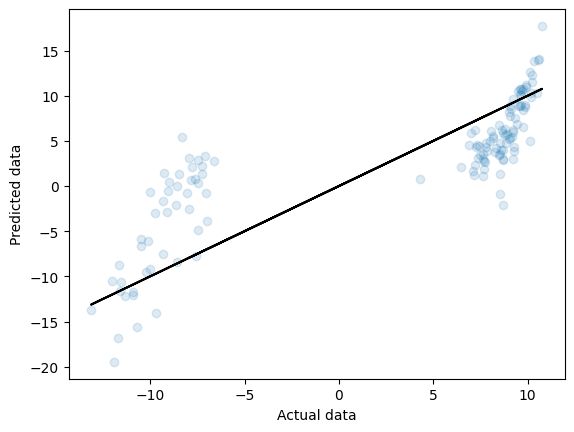

In [5]:
# predictive model at county level
X = Df.drop(columns=['county_name','netvotes'])
y = Df['netvotes']

# linear regression
stock_reg = LinearRegression().fit(X, y)
ypred = stock_reg.predict(X)
r2 = abs(stock_reg.score(X, y))
print("R^2 = ", r2)

# parity plot shows linear regression is not great
fig, ax = plt.subplots()
ax.scatter(y, ypred,alpha=0.15)
ax.plot(y,y, '-k');
ax.set_xlabel('Actual data')
ax.set_ylabel('Predicted data')

In [6]:
# finding state winner
win_actual = np.sinh(Df['netvotes']).sum()
print(win_actual) # negative value shows democrats won VA by 451138 votes

win_pred = np.sinh(ypred).sum()
print(win_pred) # predicted correct democrat win but votes are way off - more votes than people living in VA

-451137.9999999999
-130201386.3788266


###Trying Logistic Regression

In [10]:
# 1 for Republican win, 0 for Democratic win
Df['target'] = (Df['netvotes'] > 0).astype(int)

#feature scaling
features = Df.drop(['county_name', 'totalvotes', 'netvotes', 'target'], axis=1)
target = Df['target']

# standardizing
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106, 19), (27, 19), (106,), (27,))

In [12]:
#training logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(conf_matrix)
print(report)

0.8518518518518519
[[ 2  4]
 [ 0 21]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.84      1.00      0.91        21

    accuracy                           0.85        27
   macro avg       0.92      0.67      0.71        27
weighted avg       0.88      0.85      0.82        27



85% accuracy, which isn't great, performs well in predicting Republican wins, but so the model is biased toward predicting Republican wins.
^might be due to an imbalance in the training data or certain features disproportionately influencing the predictions toward Republican outcomes